# Before you start:

- Comment as much as you can 
- Always state the H0 and H1 before conducting the hypothesis test.

In [1]:
import pandas as pd
import numpy as np

# Challenge 1 - Exploring the Data

### In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. 

In [2]:
salaries_df = pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles.csv")

Examine the `salaries` dataset using the `head` function below.

In [3]:
salaries_df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,72510.0,NaN
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,NaN,13.0
3,"AGAR, BULENT B",DEPUTY COMMISSIONER,WATER MGMNT,F,Salary,NaN,132972.0,NaN
4,"AGEE, LAWRENCE",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN


### We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
salaries_df.isnull().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25528
Annual Salary         8174
Hourly Rate          25528
dtype: int64

### Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [5]:
salaries_df["Salary or Hourly"].value_counts()

Salary    25528
Hourly     8174
Name: Salary or Hourly, dtype: int64

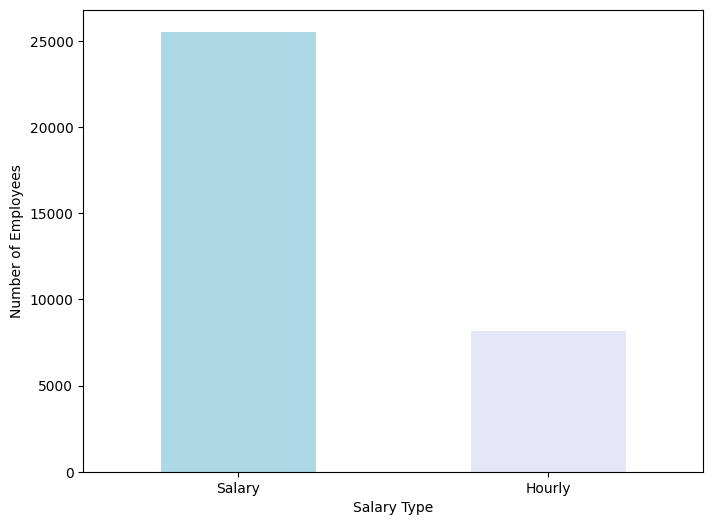

In [6]:
import matplotlib.pyplot as plt

# Count hourly and salaried employees
employee_counts = salaries_df["Salary or Hourly"].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
employee_counts.plot(kind="bar", color=["lightblue", "lavender"])
plt.xlabel("Salary Type")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)  # To display labels on the x-axis horizontally
plt.show()

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

### There are different departments in the city. List all departments and the count of employees in each department.

In [7]:
salaries_df.groupby("Department")["Name"].count()

Department
ADMIN HEARNG              38
ANIMAL CONTRL             75
AVIATION                1856
BOARD OF ELECTION        111
BOARD OF ETHICS            8
BUDGET & MGMT             44
BUILDINGS                258
BUSINESS AFFAIRS         167
CITY CLERK                88
CITY COUNCIL             362
COPA                     123
CULTURAL AFFAIRS          74
DAIS                    1033
DISABILITIES              28
FAMILY & SUPPORT         656
FINANCE                  544
FIRE                    4627
HEALTH                   467
HOUSING                   66
HOUSING & ECON DEV       154
HUMAN RELATIONS           17
HUMAN RESOURCES           75
INSPECTOR GEN             95
LAW                      398
LICENSE APPL COMM          1
MAYOR'S OFFICE           104
OEMC                    1737
POLICE                 13848
POLICE BOARD               2
PROCUREMENT               84
PUBLIC LIBRARY          1088
PUBLIC SAFETY ADMIN      244
STREETS & SAN           2175
TRANSPORTN              1113
TRE

# Challenge 2 - Hypothesis Tests

### In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [8]:
# Import the scipy.stats library for hypothesis testing
import scipy.stats as stats

#### - Null Hypothesis (H0): hourly wage of all hourly workers = $30/hr

#### - Alternative Hypothesis (H1): hourly wage of all hourly workers <> $30/hr

A "one sample test" with a "two-sided confidence interval" is being conducted on the hourly wage of workers to determine if it is significantly different from 30 dollars per hour. This means that we are testing whether the mean hourly wage is significantly different from 30 dollars per hour, and we are using a two-sided confidence interval to assess this difference.

The interval is constructed in such a way that there is a 95% confidence that the true parameter value lies within the interval. Therefore, it is an interval that accommodates both higher and lower values based on the data distribution and the selected confidence level.

In the code below, "alpha" is calculated by subtracting the confidence level ("confidence_level") from 1. This is because the confidence level is typically expressed as a number between 0 and 1, where a 95% confidence level would be represented as 0.95. By subtracting this value from 1, we obtain the "alpha" value, which would be 0.05 in this case.

An "alpha" value of 0.05 means that we are willing to accept a 5% probability of making a Type I error when rejecting a true null hypothesis. In other words, we are willing to claim that there is sufficient evidence to reject the null hypothesis if the result of a test is very unlikely to occur by chance (less than a 5% probability). This "alpha" value is an important part of decision-making in statistical hypothesis tests.

In [9]:
# Define the confidence level (95% in this case)
confidence_level = 0.95

# Define the hourly rate to be compared
expected_hourly_rate = 30  # Expected hourly rate of $30/hr

# Select the hourly wages of hourly workers
hourly_wage = salaries_df[salaries_df["Salary or Hourly"] == "Hourly"]["Hourly Rate"]

# Perform a one-sample hypothesis test
# H0: The average hourly wage of hourly workers is equal to $30/hr
# H1: The average hourly wage of hourly workers is different from $30/hr
# Use a two-tailed one-sample t-test
# p-value will be the probability that the average hourly wage is equal to $30/hr
statistic, p_value = stats.ttest_1samp(hourly_wage, expected_hourly_rate)

# Calculate the critical value for the confidence level
alpha = 1 - confidence_level

# Determine whether to reject the null hypothesis
if p_value < alpha:
    # Reject the null hypothesis, indicating that hourly wages are significantly different from $30/hr
    print("The null hypothesis is rejected. Hourly wages are significantly different from $30/hr.")
else:
    # Fail to reject the null hypothesis, indicating that there is not enough evidence to claim that hourly wages are different from $30/hr
    print("The null hypothesis is not rejected. There is not enough evidence to claim that hourly wages are different from $30/hr.")

The null hypothesis is rejected. Hourly wages are significantly different from $30/hr.


In [10]:
# We can see that p_value is very low so we reject H0

print("p_value is:", p_value)

p_value is: 3.825475847673794e-202


### We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

### Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our Null hypothesis is less than or equal to, then to reject, the test statistic must be positive (rejects the <) and the p-value below 0.05 (rejects the =).

#### - Null Hypothesis (H0): salaries this year <= last year's mean of  $86000/year a year for all salaried employees

#### - Alternative Hypothesis (H1): salaries this year > last year's mean of  $86000/year a year for all salaried employees

To interpret the results of the hypothesis test in this context,

If we want to reject this null hypothesis (meaning we believe that salaries are greater than 86,000 dollars per year), we need two things:

- a. The test statistic must be positive. This means that the difference between the sample mean and 86,000 dollars must be greater than zero.

- b. The "p-value" must be less than 0.05 (a commonly used level of significance). This means that the probability of obtaining the observed results if the null hypothesis is true must be very low.

So, in summary, **to reject the null hypothesis in a one-tailed test, we need the test statistic to be positive and the "p-value" to be less than 0.05**. If we obtain these results, we would have evidence to support the claim that salaries are greater than 86,000 dollars per year in the police force.

The code bellow performs a one-tailed t-test to determine if salaries in the police force are significantly higher than 86,000 dollars per year. If the test statistic is positive and the p-value is less than 0.05 (alpha), we reject the null hypothesis and conclude that salaries are significantly higher. Otherwise, we fail to reject the null hypothesis.

In [11]:
# Define the null hypothesis (H0) and alternative hypothesis (H1)
# H0: Salaries this year are less than or equal to $86,000/year
# H1: Salaries this year are higher than $86,000/year
# This is a one-tailed test where we are interested in the upper tail.

# Set the significance level (alpha) for a 95% confidence interval
alpha = 0.05

# Filter the data to get salaries in the police force
police_salaries = salaries_df[(salaries_df["Department"] == "POLICE") & (salaries_df["Salary or Hourly"] == "Salary")]["Annual Salary"]

# Calculate the mean salary of police employees
police_mean_salary = police_salaries.mean()

# Perform a one-sample t-test
# We specify the population mean as $86,000
# and the alternative as "greater" since we are testing if salaries are higher.
t_statistic, p_value = stats.ttest_1samp(police_salaries, 86000, alternative="greater")

# Check if the test statistic is positive and the p-value is less than alpha
if t_statistic > 0 and p_value < alpha:
    # Reject the null hypothesis
    print("We reject the null hypothesis.")
    print("Salaries in the police force are significantly higher than $86,000/year.")
else:
    # Fail to reject the null hypothesis
    print("We fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that salaries in the police force are significantly higher than $86,000/year.")

We reject the null hypothesis.
Salaries in the police force are significantly higher than $86,000/year.


### Using the `crosstab` function, find the department that has the most hourly workers. 

In [12]:
# Create a cross-tabulation (crosstab) of the "Department" and "Salary or Hourly" columns:
department_crosstab = pd.crosstab(salaries_df['Department'], salaries_df['Salary or Hourly'])
department_crosstab

Salary or Hourly,Hourly,Salary
Department,,
ADMIN HEARNG,0,38
ANIMAL CONTRL,12,63
AVIATION,1214,642
BOARD OF ELECTION,0,111
BOARD OF ETHICS,0,8
BUDGET & MGMT,2,42
BUILDINGS,0,258
BUSINESS AFFAIRS,7,160
CITY CLERK,0,88


In [13]:
# Filter the crosstab to select only the rows where "Salary or Hourly" is "Hourly" greater than 0 value
hourly_departments = department_crosstab[department_crosstab['Hourly'] > 0]
hourly_departments

Salary or Hourly,Hourly,Salary
Department,,
ANIMAL CONTRL,12,63
AVIATION,1214,642
BUDGET & MGMT,2,42
BUSINESS AFFAIRS,7,160
CITY COUNCIL,74,288
CULTURAL AFFAIRS,10,64
DAIS,745,288
DISABILITIES,1,27
FAMILY & SUPPORT,357,299


In [14]:
# Find the department with the maximum count of hourly workers
department_with_most_hourly_workers = hourly_departments['Hourly'].idxmax()

print("The department with the most hourly workers is: ", department_with_most_hourly_workers)

The department with the most hourly workers is:  STREETS & SAN


### The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

#### - Null Hypothesis (H0): hourly wage in the department >= $35 per hour.

#### - Alternative Hypothesis (H1): hourly wage in the department < $35 per hour.

In [15]:
# Extract hourly wages for the "STREETS & SAN" department (with the most hourly workers)
streets_san_hourly_wage = salaries_df[(salaries_df["Department"] == "STREETS & SAN") & (salaries_df["Salary or Hourly"] == "Hourly")]["Hourly Rate"]

# Perform a one-sample t-test with a null hypothesis that the hourly wage is greater than or equal to $35
# The alternative hypothesis is that the hourly wage is less than $35
# We use a 95% confidence level, which corresponds to a significance level alpha of 0.05
# Specify the population mean as $35
# And the alternative as "less" since we are testing if salaries are less
t_statistic, p_value = stats.ttest_1samp(streets_san_hourly_wage, 35, alternative="less")

# Check if the p-value is less than the significance level alpha (0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is evidence that the hourly wage in 'STREETS & SAN' department is less than $35/hour.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the hourly wage in 'STREETS & SAN' department is less than $35/hour.")

Fail to reject the null hypothesis: There is not enough evidence to conclude that the hourly wage in 'STREETS & SAN' department is less than $35/hour.


# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


### In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [16]:
# Extract hourly wages for hourly workers
hourly_wages = salaries_df[salaries_df["Salary or Hourly"] == "Hourly"]["Hourly Rate"]

# Calculate the mean and standard error of hourly wages
mean_hourly_wage = hourly_wages.mean()
std_error = stats.sem(hourly_wages)

print(mean_hourly_wage)
print(std_error)

34.58644971862002
0.14694742867989574


In [17]:
# Set the confidence level (95% confidence interval)
confidence_level = 0.95

# Calculate the degrees of freedom
degrees_of_freedom = len(hourly_wages) - 1

# Compute the confidence interval
confidence_interval = stats.t.interval(confidence_level, df=degrees_of_freedom, loc=mean_hourly_wage, scale=std_error)

# Print the confidence interval
print(f"95% Confidence Interval for Mean Hourly Wage: (${confidence_interval[0]}, ${confidence_interval[1]})")

95% Confidence Interval for Mean Hourly Wage: ($34.29839539204317, $34.874504045196865)


**We are 95% sure that the mean hourly wage of all hourly workers is between 34.29 and 34.87.**

We are reasonably confident that the true mean hourly wage falls within this range, but we cannot be absolutely certain. The 95% refers to the confidence level, which means that if we were to repeat this process many times and calculate a confidence interval in each iteration, we would expect that approximately 95% of those intervals contain the true mean.

### Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [18]:
# Filter the DataFrame to include only salaried employees in the police department
police_salaries = salaries_df[(salaries_df["Salary or Hourly"] == "Salary") & (salaries_df["Department"] == "POLICE")]["Annual Salary"]

# Calculate the mean and standard error of annual salaries for police employees
mean_police_salary = police_salaries.mean()
std_error_police = stats.sem(police_salaries)

print(mean_police_salary)
print(std_error_police)

88834.11892361111
153.0509585263483


In [19]:
# Set the confidence level (95% confidence interval)
confidence_level = 0.95

# Calculate the degrees of freedom
degrees_of_freedom = len(police_salaries) - 1

# Compute the confidence interval
confidence_interval_police = stats.t.interval(confidence_level, df=degrees_of_freedom, loc=mean_police_salary, scale=std_error_police)

# Print the confidence interval
print(f"95% Confidence Interval for Mean Annual Salary in Police Department: (${confidence_interval_police[0]}, ${confidence_interval_police[1]})")

95% Confidence Interval for Mean Annual Salary in Police Department: ($88534.1182885883, $89134.11955863392)


**We are 95% sure that the mean annual salary in police department is between 88534 and 89134.**

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

### In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

**In the codes bellow we calculate the Z-statistic and p-value for a two-sided hypothesis test comparing the proportion of hourly workers to the expected proportion of 25%. If the p-value is less than the chosen significance level (0.05), we would reject the null hypothesis, indicating a significant difference in the proportion of hourly workers. Otherwise, we would fail to reject the null hypothesis, suggesting no significant difference.**

#### - H0: proportion of hourly workers in the City of Chicago = 25%. 

#### - H1: proportion of hourly workers in the City of Chicago <> 25%.

In [20]:
# Import the necessary library
from statsmodels.stats.proportion import proportions_ztest

In [21]:
# Calculate the count of hourly workers in the dataframe
count_hourly = len(salaries_df[salaries_df["Salary or Hourly"] == "Hourly"])

# Calculate the total number of observations (total of employees) in the dataframe
n = len(salaries_df)

# Set the expected proportion to 0.25, which represents 25%
expected_proportion = 0.25  

In [22]:
# Perform the hypothesis test
# alternative="two-sided" for a two-tailed test. 
# Considering whether the actual proportion could be either greater or less than the expected proportion.
z_statistic, p_value = proportions_ztest(count_hourly, n, value=expected_proportion, alternative="two-sided")

# Print the results
print("Z-Statistic:", z_statistic)
print("p-Value:", p_value)

Z-Statistic: -3.1962453870335
p-Value: 0.0013922864704323116


**Z-Statistic** is a measure used in hypothesis testing to assess if a sample differs significantly from a population or if two samples differ from each other. In our context, it **indicates whether the proportion of hourly workers in our sample is significantly lower than the expected 25%**. The negative value (-3.1962453870335) suggests a significant difference in a negative direction, meaning fewer hourly workers than expected.

The magnitude of the Z-statistic matters. **A larger absolute value indicates stronger evidence against the null hypothesis**. In this case, the relatively large absolute **Z-value suggests a statistically significant difference**, with fewer hourly workers than expected.

In [23]:
# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: The proportion of hourly workers is significantly different from 25%.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the proportion of hourly workers and 25%.")

Reject the null hypothesis: The proportion of hourly workers is significantly different from 25%.
